# Set up

## Import libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data set and explore a bit

In [17]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

In [18]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

# Linear SVM Classification

In [21]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [22]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [23]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

SVC(C=1e+100, kernel='linear')

In [24]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [25]:
def plot_svc_decision_boundary(svm_clf: SVC, xmin, xmax):
    bias = svm_clf.intercept_[0]
    weight = svm_clf.coef_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -weight[0] / weight[1] * x0 - bias / weight[1]

    margin = 1 / weight[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#AAA", zorder=-1)

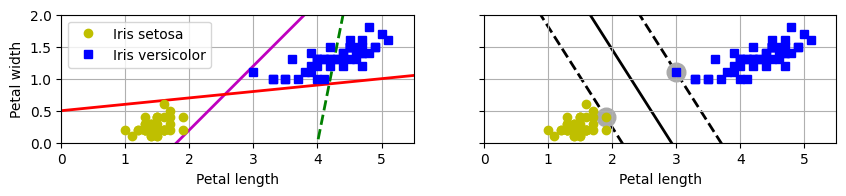

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.legend(loc="upper left")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.gca().set_aspect("equal")

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.gca().set_aspect("equal")

plt.show()

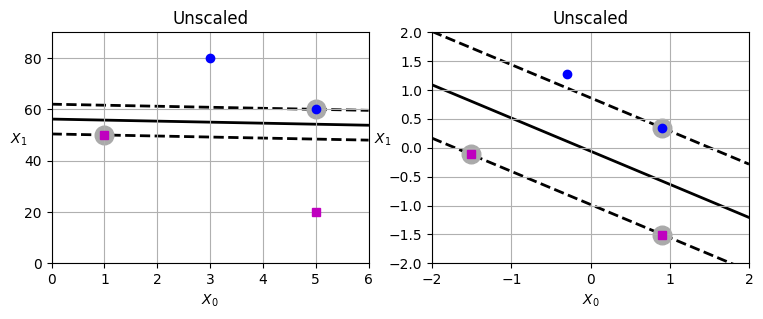

In [39]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float32)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
Xs_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(Xs_scaled, ys)

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.axis([0, 6, 0, 90])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$", rotation=0)
plt.title("Unscaled")
plt.grid()

plt.subplot(122)
plt.plot(Xs_scaled[:, 0][ys == 0], Xs_scaled[:, 1][ys == 0], "ms")
plt.plot(Xs_scaled[:, 0][ys == 1], Xs_scaled[:, 1][ys == 1], "bo")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.axis([-2, 2, -2, 2])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$", rotation=0)
plt.title("Unscaled")
plt.grid()

plt.show()